# Work Overview

This document aims to show what work I have completed with a mix of actual code and indepth text blocks explaining what I have done. Everything is viewable at 'https://github.com/DJSaunders1997/Masters-Project/'

## Getting Data

Mouse data was downloaded from 'https://github.com/gabysbrain/datasets' as instructed and mouse data found in '/datasets-sa_mouse_tracking/'.

I can't exactly remeber which scripts I ran, some of the seemed to not work and delete all the data but I ended up with a single 'mouse_events.json' file containing all data for the Turk Study data and a folder of 30ish smaller json files such as 'no-sa_2016-12-29 20_48_14-2.json' for the Lab Study.
This data is saved on my gitHub repo under 'All-Data.zip'.

# Exploring the JSON files

I'm unsure how to analyse JSON data directly so next I had to find a way to convert the JSON into a structed more familiar tabular csv format. The Turk Studys 'mouse_events.json' looks like this 

In [1]:
'''
[
  {
    "events": [
      {
        "button": 1,
        "event_type": "mousedown",
        "target": "alloc-slider-1",
        "time": 1417182276985,
        "x": 477,
        "y": 405
      },
      {
        "button": 1,
        "event_type": "mouseup",
        "target": "alloc-slider-1",
        "time": 1417182277096,
        "x": 478,
        "y": 405
      }
    ],
    "step": "1",
    "turkId": "A35YFAFWP33C70"
  },
  ...
  ''';

The Lab study data consists of many files in this format. The mouseevents-events looks the same as the Turk Study other than all the turkIds being set to 0. There is also additional information about the user which is not used to study mouse data so it can be ignored.

In [2]:
'''
{
    "mouseevents-events": "[{\"turkId\":0,\"step\":\"1\",\"events\":[{\"x\":433,\"y\":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#
    "demographics-turk_id": "\"0\"",
    "demographics-assignment_id": "\"ASSIGNMENT_ID_NOT_AVAILABLE\"",
    "demographics-age": "\"17\"",
    "demographics-computer_experience": "\"2\"",
    "demographics-investment_experience": "\"1\"",
    ...
}
'''

'\n{\n    "mouseevents-events": "[{"turkId":0,"step":"1","events":[{"x":433,"y":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#\n    "demographics-turk_id": ""0"",\n    "demographics-assignment_id": ""ASSIGNMENT_ID_NOT_AVAILABLE"",\n    "demographics-age": ""17"",\n    "demographics-computer_experience": ""2"",\n    "demographics-investment_experience": ""1"",\n    ...\n}\n'

# Converting Turk Mouse events into CSV

This is all handled by functions inside of the JSONtoCSV.py file I've created as shown below. 

Can't explain exactly what the functions do as they were written ages ago and need to be recommented properly. The functions also 'normalize' the time field. Rather than the time for each mouse event being recorded in UNIX time, the first mouse event of a user is changed to 0 and the rest of that users mouse events are given in seconds since the first mouse event.

Before running this code the 'Original-Data.zip' file must be unzipped to a folder named 'Original-Data'. It needs to be zipped as the file is too big to be uploaded to github otherwise.

In [3]:
import pandas as pd

from JSONtoCSV import convert_json_to_csv # import function to convert Turk data

# Should take around a minute to process.
#
df_turk = convert_json_to_csv(r'Original-Data\all_turk_study_data\mouse_events.json', 'Turk-Data.csv')
print(f'\n Number of rows: {df_turk.shape[0]} ')
df_turk.head()

1 / 152112 completed A35YFAFWP33C70
10001 / 152112 completed A10WZYTR4O4V6S
20001 / 152112 completed A30OOETQPWFPHK
30001 / 152112 completed A309P6D2ECOLH7
40001 / 152112 completed A2ZH6W3O33PVJZ
50001 / 152112 completed ASB8T0H7L99RF
60001 / 152112 completed A3JI3B5GTVA95F
70001 / 152112 completed AVPKE76DJLWK6
80001 / 152112 completed A1DJD0J0BTE1X8
90001 / 152112 completed A3F3LNKCCXS42L
100001 / 152112 completed A1I20G9FII2FN5
110001 / 152112 completed A3J2CI4J5V3MLP
120001 / 152112 completed A1P8M5BKOTAA8I
130001 / 152112 completed A2QYPEWPAGGKLQ
140001 / 152112 completed A30QJF394U1VRY
150001 / 152112 completed AAOCGTXKZTC8H
Time taken: 22 s

 Number of rows: 1293073 


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70


I've shown that the turk data can be converted, but the lab study is more challenging. This script goes through the files in a given directory looking for JSON files and puts them together into a single dataframe. 

Each individual is also assigned a new turk ID as in the JSON file they're all set to 0. Additionally the file the data came from is appended as a new column so that we can compare sa or no sa in the future if we want to. As before the time is also normilized.

It's worth noteing that the targets are different for the Turk and Lab data. Turk data has items like 'alloc-slider-1' where as Lab data is of the format '[id="alloc-slider-return-4"]>svg>g>circle'. Looks like these just need to be renamed so they match up but some of the Lab data targets are hard to understand. 

In [4]:
from JSONtoCSV import lab_convert_json_to_csv # import function to convert Lab data

# Should take around a minute to process.
#
df_lab = lab_convert_json_to_csv(r'Original-Data\all_lab_study_data', 'Lab-Data.csv')
print(f'\n Number of rows: {df_lab.shape[0]} ')
df_lab.head()

Opening File global_sa_sl_both_2017-02-08 12_48_51.json
1 / 807 completed
201 / 807 completed
401 / 807 completed
601 / 807 completed
801 / 807 completed
Opening File global_sa_sl_both_2017-02-09 17_28_24.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-09 17_28_30.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-10 18_16_36.json
1 / 258 completed
201 / 258 completed
Opening File global_sa_sl_both_2017-02-13 11_15_26.json
1 / 282 completed
201 / 282 completed
Opening File global_sa_sl_both_2017-02-13 11_50_43.json
1 / 314 completed
201 / 314 completed
Opening File global_sa_sl_both_2017-02-15 17_28_32.json
1 / 1169 completed
201 / 1169 completed
401 / 1169 completed
601 / 1169 completed
801 / 1169 completed

,button,event_type,target,time,x,y,step,turkId,file
0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json


We now have the 1,293,073 rows of Turk data and the 58,285 rows of Lab data in a format we can work with. Now some initial exploration of the data can begin.

# Initial Data Exploration

Focusing first on the Turk data get some ideas of whats happening in the data.

In [11]:
# Number of users for each dataset
print(f"Turk Number of unique Ids = { len(df_turk['turkId'].unique()) }")
print(f"Lab  Number of unique Ids = { len(df_lab['turkId'].unique()) } \n")

# Find largest mouse position
print( f"Turk Largest x = { df_turk['x'].max() }, y = { df_turk['y'].max() } " )
print( f"Lab  Largest x = { df_lab['x'].max() }, y = { df_lab['y'].max() } " )



Turk Number of unique Ids = 461
Lab  Number of unique Ids = 18 

Turk Largest x = 1879.0, y = 2344.0 
Lab  Largest x = 1913.0, y = 1355.0 


We can see that the Turk data contains many more individuals than the Lab data. To make the initial exploration easier I will take a small subset of the Turk data of roughly equal size to the Lab data.

In [41]:
# Get first 18 Ids from Turk Data
firstIds = df_turk['turkId'].unique()[:18]
df_turk_small = df_turk[ df_turk['turkId'].isin(firstIds) ]

print(f"Turk_small Number of unique Ids = { len(df_turk_small['turkId'].unique()) }")

df_turk_small

Turk_small Number of unique Ids = 18


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70
...,...,...,...,...,...,...,...,...
24186,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,1,A166A2M31CW2C7
24187,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,2,A166A2M31CW2C7
24188,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,3,A166A2M31CW2C7
24189,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,4,A166A2M31CW2C7


# Viewing Mouse Paths

He I aim to visualise the paths a users mouse has taken over the course of the task. Maybe we could see that the lab mouse data is more messy if theyre constantly tweaking the results, but turk data may be neater as they don't mess around as much.

These initial results don't see to reveal too much.
 
TODO maybe in the future save these plots as images feed into a CNN just to see what happens? 

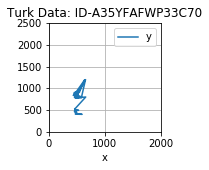

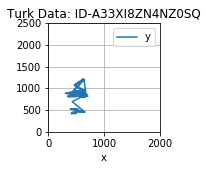

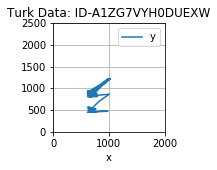

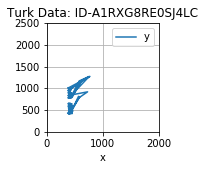

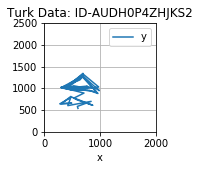

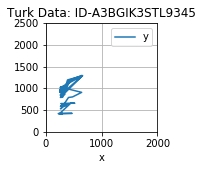

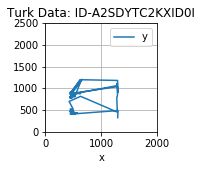

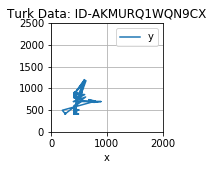

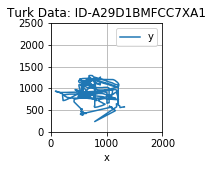

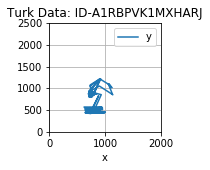

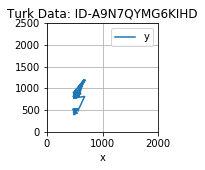

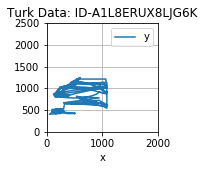

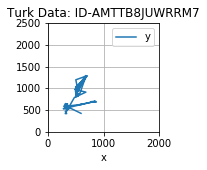

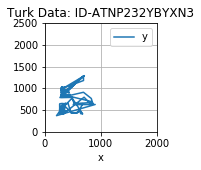

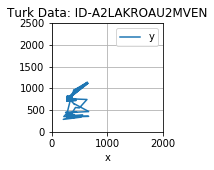

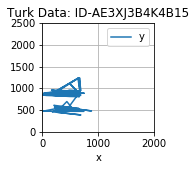

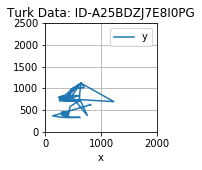

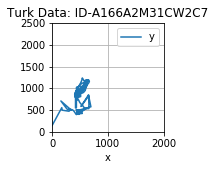

In [46]:
# View paths of Smaller Turk Data

turk_small_Ids = df_turk_small['turkId'].unique()

for ID in turk_small_Ids:
    title_format = f'Turk Data: ID-{ID}'
    df_turk_small[ df_turk_small['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

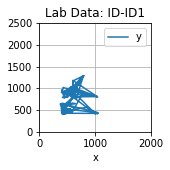

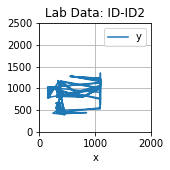

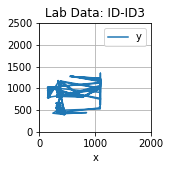

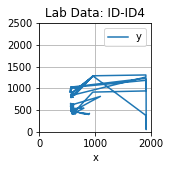

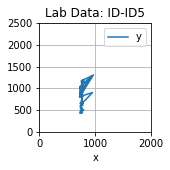

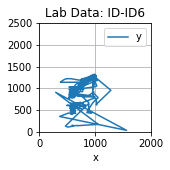

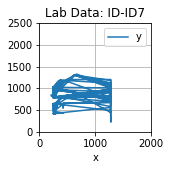

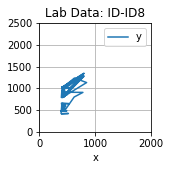

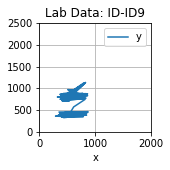

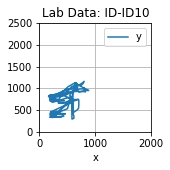

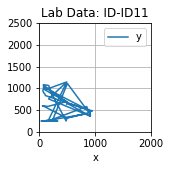

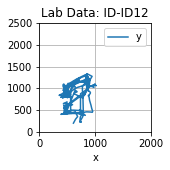

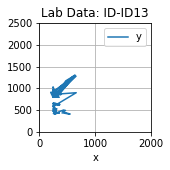

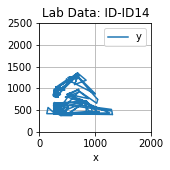

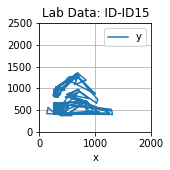

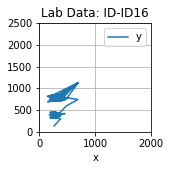

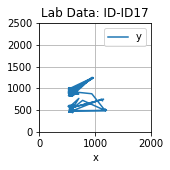

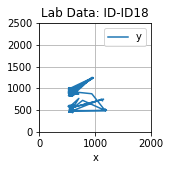

In [44]:
# View paths of Lab Data

lab_Ids = df_lab['turkId'].unique()

for ID in lab_Ids:
    title_format = f'Lab Data: ID-{ID}'
    df_lab[ df_lab['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

In [30]:
#